In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams["font.family"]="Times New Roman"
import seaborn as sns

In [2]:
database_name="data2"
def load_data(name):
    location="./data/"+name+".csv"
    data=pd.read_csv(location,sep=",").iloc[:,:]
    return data

In [202]:
data_org=load_data(database_name)
# data_x,data_y=data_org.iloc[:,:-1],data_org.iloc[:,-1]
data_org["Group_d"]=np.zeros(data_org.shape[0])
data_org["Group_l"]=np.zeros(data_org.shape[0])
data_org

,Ltx,D,MI,y,Group_d,Group_l
0,80,5,0.701486,0.951415,0.0,0.0
1,90,5,0.703557,1.194033,0.0,0.0
2,100,5,1.272102,1.367080,0.0,0.0
3,110,5,0.703557,1.485324,0.0,0.0
4,120,5,0.971735,1.602606,0.0,0.0
...,...,...,...,...,...,...
151,160,60,0.255552,0.355487,0.0,0.0
152,170,60,0.370458,0.362534,0.0,0.0
153,180,60,0.261870,0.367923,0.0,0.0
154,190,60,0.262358,0.370458,0.0,0.0


In [204]:
data_org["Group_l"][data_org["Ltx"]<111]="a"
data_org["Group_l"][(data_org["Ltx"]<141) & (111<data_org["Ltx"])]="b"
data_org["Group_l"][(data_org["Ltx"]<171) & (141<data_org["Ltx"])]="c"
data_org["Group_l"][(data_org["Ltx"]<201) & (171<data_org["Ltx"])]="d"

<ipython-input-204-5ba69ee0d08b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_org["Group_l"][data_org["Ltx"]<111]="a"


In [205]:
data_org["Group_d"][data_org["D"]<16]="A"
data_org["Group_d"][(data_org["D"]<31) & (15<data_org["D"])]="B"
data_org["Group_d"][(data_org["D"]<46) & (31<data_org["D"])]="C"
data_org["Group_d"][(data_org["D"]<61) & (46<data_org["D"])]="D"
data_org

<ipython-input-205-af1106844c42>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_org["Group_d"][data_org["D"]<16]="A"


,Ltx,D,MI,y,Group_d,Group_l
0,80,5,0.701486,0.951415,A,a
1,90,5,0.703557,1.194033,A,a
2,100,5,1.272102,1.367080,A,a
3,110,5,0.703557,1.485324,A,a
4,120,5,0.971735,1.602606,A,b
...,...,...,...,...,...,...
151,160,60,0.255552,0.355487,D,c
152,170,60,0.370458,0.362534,D,c
153,180,60,0.261870,0.367923,D,d
154,190,60,0.262358,0.370458,D,d


In [256]:
data_org[data_org["Group_d"]=="B"]["MI"].min()

0.303769669

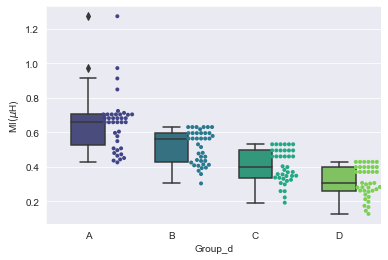

In [218]:
# fig,ax=plt.subplots(figsize=[10,5])
#参考链接
#https://stackoverflow.com/questions/56654941/how-to-change-the-position-of-a-single-swarm-group
ax=sns.boxplot(x="Group_d",y="MI",data=data_org,width=0.4, palette="viridis")
ax=sns.swarmplot(x="Group_d",y="MI",data=data_org, palette="viridis",size=4)
ax.set_ylabel("MI$(\mu$H)")
for i in range(4):
    c0 = ax.get_children()[i]
    x,y = np.array(c0.get_offsets()).T
    xnew=x+.35
    offsets = list(zip(xnew,y))
    c0.set_offsets(offsets)
plt.savefig("./figure/data_pre/violine_d.png",dpi=300,bbox_inches="tight")


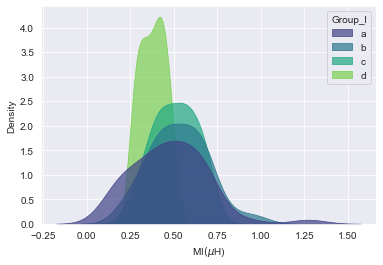

In [219]:
sns.set_style("darkgrid")
ax=sns.kdeplot(data=data_org,x="MI",hue="Group_l", common_norm=False, palette="viridis",fill=True,
   alpha=0.7,linewidth=0.7)
# g1=sns.kdeplot(data_org["MI"],color="r",label="all")
ax.set_xlabel("MI$(\mu$H)")
plt.savefig("./figure/data_pre/density_l.png",dpi=300,bbox_inches="tight")
# g1.legend()

<AxesSubplot:xlabel='Ltx', ylabel='MI'>

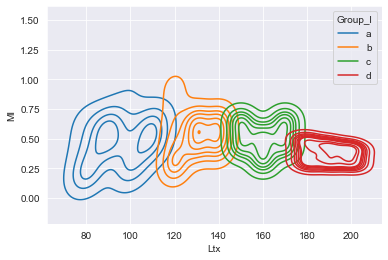

In [242]:
sns.kdeplot(data=data_org,x="Ltx",y="MI",hue="Group_l" )